# HIV Methylation Age Advancement: Confounders

We know that there is a considerable amount of confounding going on with our HIV-associated aging signal and the patient's cellular composition. Patients with HIV inherently have different cellular compositions including lower CD4 T-cell counts and higher proportions of other cell types. In addition we know that in the normal aging process the composition of blood changes througout time.  It is very hard to determine whether appearant age advancement is due to age associated blood composition chnages which happen as a direct consequence of HIV infection, or if HIV infection causes accelerated aging resulting in an adjustment of the blood makeup.  

In [1]:
import NotebookImport
from IPython.display import clear_output
from HIV_Age_Advancement import *
from Setup.DX_Imports import *

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

importing IPython notebook from Setup/DX_Imports

In [2]:
import statsmodels.api as sm
import seaborn as sns

sns.set_context("paper", font_scale=1.7, rc={"lines.linewidth": 2.5})
sns.set_style("white")

###Looking at Predicted Time of Onset  
* The idea of age acceleration, only really makes sense in this context as a person should age normally until the onset of the disease

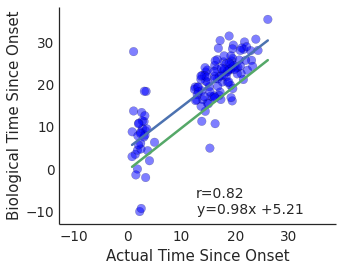

In [3]:
fig, ax = subplots(figsize=(5,4))
plot_regression(a2, p2, ax=ax)
fig.tight_layout()

Interestingly a lot of the paitents off the diagnonal in the recently diagnosed group have detectable HIV rna in the blood plasma.

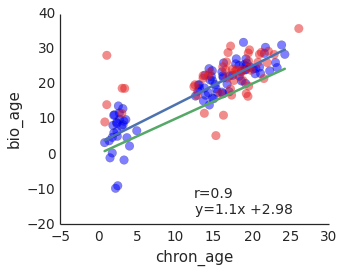

In [4]:
fig, ax = subplots(figsize=(5,4))
plot_regression(a2.ix[ti(labs['LLQ PLASMA'] != '>LLQ')], p2, ax=ax)
series_scatter(a2.ix[ti(labs['LLQ PLASMA'] == '>LLQ')], p2, color=colors[0],
               ax=ax, ann=None)
fig.tight_layout()

####Further inspection of age  
* We see a relatively big trend of age advancement with patient age  
* We have a high degree of correlation between these two variables in our dataset  
* As can be seen below, these two variables age tighly correlated for the short term infected patients with a little more variablity for the chronic HIV patients 
* It can also be seen that the patients with recent HIV infection were infected at a considerably older age than those with long term infection

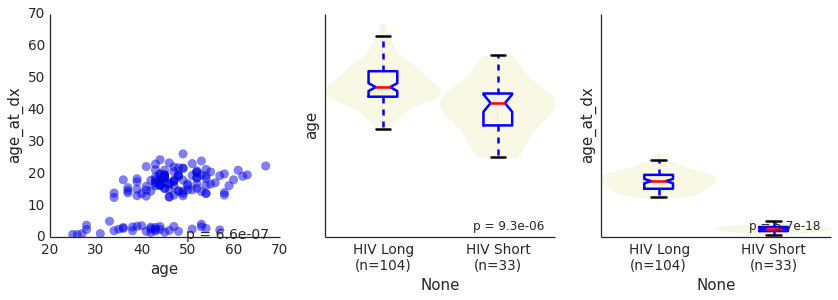

In [5]:
fig, axs = subplots(1,3, figsize=(14,4), sharey=True)
age_at_dx = (clinical['estimated duration hiv (months)'] / 12.)
age_at_dx.name = 'age_at_dx'
series_scatter(age, age_at_dx.ix[duration.index], ax=axs[0])
violin_plot_pandas(duration[duration != 'Control'], age, ax=axs[1])
violin_plot_pandas(duration, age_at_dx, ax=axs[2])
for ax in axs:
    prettify_ax(ax)

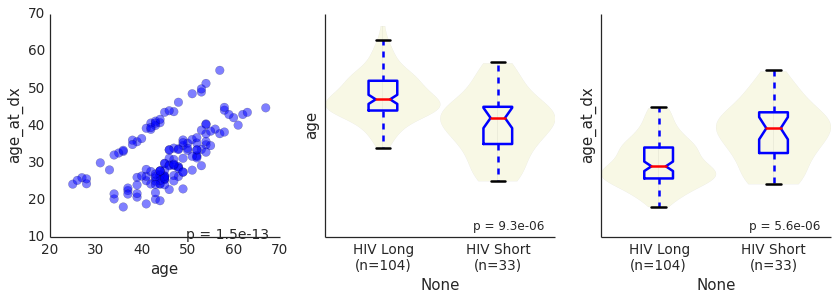

In [6]:
fig, axs = subplots(1,3, figsize=(14,4), sharey=True)
age_at_dx = age - (clinical['estimated duration hiv (months)'] / 12.)
age_at_dx.name = 'age_at_dx'
series_scatter(age, age_at_dx.ix[duration.index], ax=axs[0])
violin_plot_pandas(duration[duration != 'Control'], age, ax=axs[1])
violin_plot_pandas(duration, age_at_dx, ax=axs[2])
for ax in axs:
    prettify_ax(ax)

####Adjust out the age effect in age advancement  
* This could be an artifact of a number of things including the association of age with duration of HIV  
* In general we don't have much evidence for an age dependent effect but there is a slight trend 
* For now we will look at both the raw age advancment and the age adjusted advancement 
* When age is not adjusted for its probably a good idea to use age as a covariate as we might get spurious correlations with are artifacts of this age trend

In [7]:
age_advancement = (p2 - a2).ix[duration.index].dropna()
age_advancement.name = 'age_advancement'

reg = linear_regression(age, age_advancement)
age_adj = (age_advancement - age * reg['slope']).dropna()
age_adj = age_adj - reg.intercept
age_adj.name = 'age advancment (adjusted)'

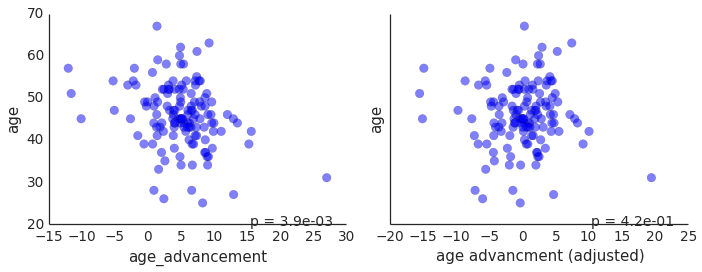

In [8]:
fig, axs = subplots(1,2, figsize=(10,4), sharey=True)
series_scatter(age_advancement, age, ax=axs[0])
series_scatter(age_adj, age, ax=axs[1])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

In [9]:
residual = (pred_c - age).ix[duration.index]
residual.name = 'residual'

reg = linear_regression(age, residual)
resid_adj = (residual - age * reg['slope']).dropna()
resid_adj = resid_adj - reg.intercept
resid_adj.name = 'residual (adjusted)'

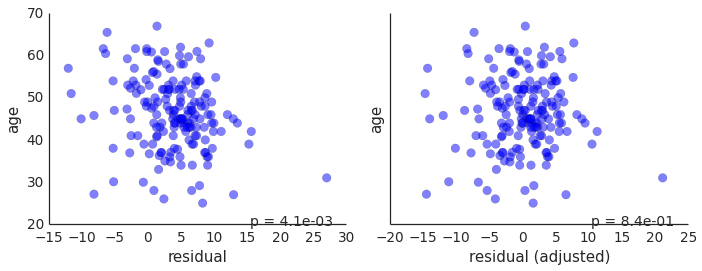

In [10]:
fig, axs = subplots(1,2, figsize=(10,4), sharey=True)
series_scatter(residual, age, ax=axs[0])
series_scatter(resid_adj, age, ax=axs[1])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

In [11]:
#r = p2 - a2
a,b,c = residual.groupby(duration)

In [12]:
sp.stats.bartlett(a[1].dropna(),  c[1].dropna())

(10.332844548543132, 0.0013068364650060569)

In [13]:
sp.stats.bartlett(a[1].dropna(), b[1].dropna(), c[1].dropna())

(28.829830069211571, 5.4913856357954575e-07)

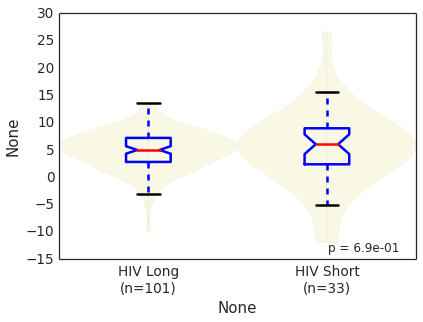

In [14]:
violin_plot_pandas(duration, p2 - a2)

## Look at Confounders

Data from the labs

In [15]:
l2 = labs.ix[:, labs.dtypes.isin([dtype('int64'), dtype('float64')])].dropna(1, how='all')
l3 = labs.ix[:, ti(labs.apply(lambda s: len(s.unique()), axis=0) < 6)]

In [16]:
spearman_pandas(residual, np.log2(l2['CD4/CD8 ratio']))

rho   -0.20
p      0.02
dtype: float64

In [17]:
pearson_pandas(residual, np.log2(l2['CD4/CD8 ratio']))

rho   -0.13
p      0.13
dtype: float64

In [18]:
spearman_pandas(residual.ix[ti(duration=='HIV Long')], 
                np.log2(l2['CD4/CD8 ratio']))

rho   -0.29
p      0.00
dtype: float64

In [19]:
spearman_pandas(resid_adj.ix[ti(duration=='HIV Short')], 
                np.log2(l2['CD4/CD8 ratio']))

rho   -0.07
p      0.72
dtype: float64

In [20]:
spearman_pandas(resid_adj, np.log2(l2['CD4/CD8 ratio']))

rho   -0.21
p      0.02
dtype: float64

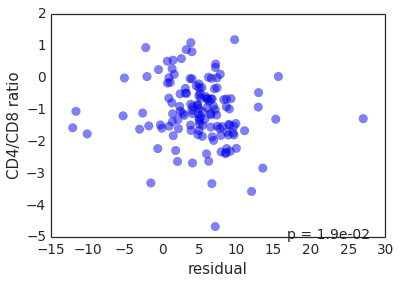

In [21]:
series_scatter(residual, np.log2(l2['CD4/CD8 ratio']))

In [22]:
l2 = labs.ix[:, labs.dtypes.isin([dtype('int64'), dtype('float64')])].dropna(1, how='all')
l3 = labs.ix[:, ti(labs.apply(lambda s: len(s.unique()), axis=0) < 6)]
keepers = labs.index.diff(['RG065','RG175','RG279','RA182','RM285'])
keepers = keepers.intersection(duration.index)
l2 = l2.ix[keepers]
l3 = l3.ix[keepers]

In [23]:
duration.name = 'duration'

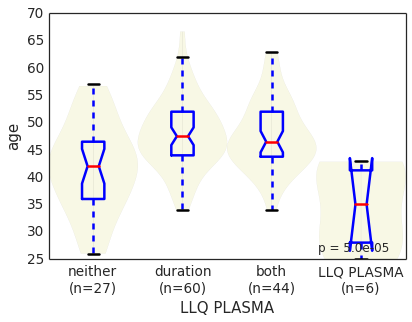

In [24]:
violin_plot_pandas(combine(labs['LLQ PLASMA'] == '>LLQ', duration=='HIV Long'),
                   age, order=['neither','duration','both','LLQ PLASMA'])

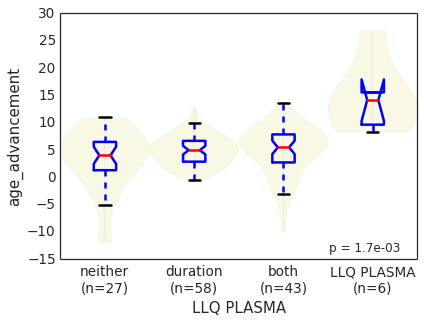

In [25]:
violin_plot_pandas(combine(labs['LLQ PLASMA'] == '>LLQ', duration=='HIV Long'),
                   age_advancement, order=['neither','duration','both','LLQ PLASMA'])

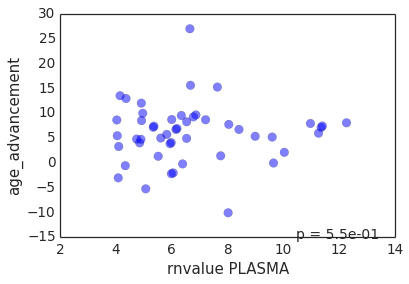

In [26]:
series_scatter(np.log(labs['rnvalue PLASMA'][labs['LLQ PLASMA'] == '>LLQ']), 
               age_advancement)

In [27]:
screen_feature(age_advancement, pearson_pandas, l2.T, align=False).head()

,rho,p,q
MCV,-0.33,1.40e-04,0.01
MCH,-0.31,3.11e-04,0.01
age,-0.29,7.12e-04,0.01
Monocyte %,0.25,3.70e-03,0.05
WBC,-0.21,1.60e-02,0.17


In [28]:
bins = np.floor(age_advancement / 5.)
bins = bins.clip(-1,2)
spearman_pandas(bins, l2.MCV)

rho   -3.36e-01
p      9.34e-05
dtype: float64

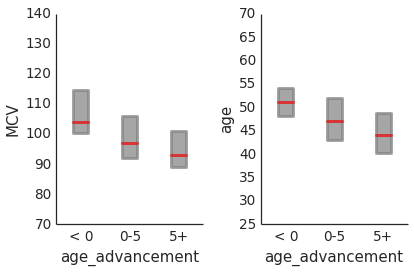

In [29]:
fig, axs = subplots(1,2, figsize=(6,4))
bins = np.floor(age_advancement / 5.)
bins = bins.clip(-1,2).map({-1: '< 0', 0:'0-5', 1:'5+', 2:'5+'})
box_plot_pandas(bins, l2.MCV, order=['< 0','0-5','5+'], ax=axs[0])
box_plot_pandas(bins, l2['age'], order=['< 0','0-5','5+'], ax=axs[1])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

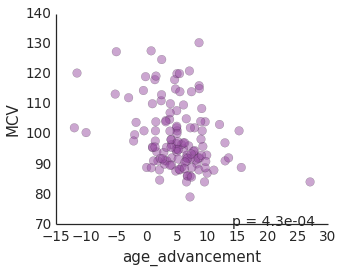

In [30]:
fig, ax = subplots(figsize=(5,4))
series_scatter(age_advancement, l2.MCV, ax=ax, color=colors[3],
               edgecolor='black')
prettify_ax(ax)
fig.tight_layout()
fig.savefig(FIGDIR + 'mcv_age_advancement.png', dpi=300)

Cell composition from mixture model estimates

In [31]:
screen_feature(age_advancement, spearman_pandas, cell_counts.T, align=False)

,rho,p,q
NK,0.35,3.04e-05,1.82e-04
Gran,-0.20,1.94e-02,5.82e-02
CD8T,0.18,4.20e-02,8.20e-02
CD4T,-0.17,5.47e-02,8.20e-02
Bcell,0.09,3.22e-01,3.86e-01
Mono,0.05,5.88e-01,5.88e-01


While we see a significant effect of NK cell concentration with increasing age advancment, this does not seem to be specific to HIV+ patients.

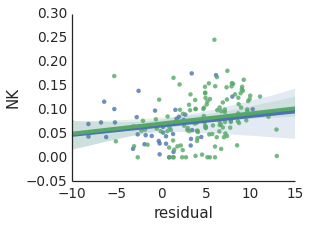

In [32]:
fig, ax = subplots(1,1, figsize=(4,3))
rr = cell_counts.NK
k = pred_c.index
hiv = duration != 'Control'

sns.regplot(*match_series(residual.ix[k], rr.ix[ti(hiv==0)]),
            ax=ax, label='HIV+')
sns.regplot(*match_series(residual.ix[k], rr.ix[ti(hiv>0)]),
            ax=ax, label='Control')
prettify_ax(ax)

## Multivariate modeling of confounders

Here we are looking at biological age, MCV, and NK cell count.  We contructed a similar model with monocyte count as well but found that it did not add to the model fit. 

In [33]:
age_adj.name = 'age_advancement'
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'

In [34]:
age.name = 'bio_age'
duration_t = clinical['estimated duration hiv (months)'] / 12.
duration.name = 'duration'
monocytes = labs['Monocyte %']
monocytes.name = 'monocytes'

df = process_factors([age_advancement, duration, age, age_at_dx, l2.MCV, l2.MCH, 
                      cell_counts.NK, cell_counts.CD4T, monocytes], standardize=True)
fmla = robjects.Formula('age_advancement ~ bio_age + MCV + NK')
m = robjects.r.lm(fmla, df)
s = robjects.r.summary(m)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.405e-16  7.870e-02   0.000  1.00000    
bio_age     -2.785e-01  8.148e-02  -3.418  0.00085 ***
MCV         -2.696e-01  8.053e-02  -3.348  0.00107 ** 
NK           2.268e-01  8.012e-02   2.831  0.00541 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8973 on 126 degrees of freedom
Multiple R-squared:  0.2135,	Adjusted R-squared:  0.1948 
F-statistic:  11.4 on 3 and 126 DF,  p-value: 1.148e-06




####Modeling residuals of aging model with HIV and cell composition  
* Here we have to use the estimated cell counts as we do not have blood work for the controls

In [35]:
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
age.name = 'chron_age'
pred_c.name = 'bio_age'

In [36]:
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
df = process_factors([residual, hiv, age, cell_counts.NK, cell_counts.CD4T, cell_counts.CD8T,
                      cell_counts.Bcell, cell_counts.Mono, cell_counts.Gran],
                     standardize=False)
fmla = robjects.Formula('residual ~ chron_age + HIV + NK + CD4T + CD8T + Bcell + Mono + Gran')
m = robjects.r.lm(fmla, df)
s = robjects.r.summary(m)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   6.95670    2.86269   2.430  0.01616 * 
chron_age    -0.12199    0.04081  -2.989  0.00322 **
HIV           3.76065    1.14472   3.285  0.00124 **
NK           20.95787    8.10056   2.587  0.01053 * 
CD4T         -7.27261    6.90030  -1.054  0.29343   
CD8T          1.36514    5.73608   0.238  0.81218   
Bcell       -17.09210   12.50601  -1.367  0.17356   
Mono         -9.15373   14.22749  -0.643  0.52086   
Gran               NA         NA      NA       NA   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.567 on 166 degrees of freedom
Multiple R-squared:  0.251,	Adjusted R-squared:  0.2195 
F-statistic: 7.948 on 7 and 166 DF,  p-value: 2.613e-08




In [37]:
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
df = process_factors([residual, hiv, pred_c, age, cell_counts.NK, cell_counts.CD4T, cell_counts.CD8T,
                      cell_counts.Bcell, cell_counts.Mono, cell_counts.Gran],
                     standardize=False)
fmla = robjects.Formula('residual ~ bio_age + HIV + NK')
m = robjects.r.lm(fmla, df)
s = robjects.r.summary(m)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.04274    1.95424  -4.627 7.32e-06 ***
bio_age      0.16437    0.03806   4.318 2.66e-05 ***
HIV          4.28038    0.80852   5.294 3.66e-07 ***
NK          16.44514    7.37437   2.230   0.0271 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.428 on 170 degrees of freedom
Multiple R-squared:  0.2787,	Adjusted R-squared:  0.266 
F-statistic:  21.9 on 3 and 170 DF,  p-value: 4.851e-12




####Looking at residuals of model fit with cell composition  
* This is _very_ conservative

In [38]:
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
age.name = 'chron_age'
pred_c.name = 'bio_age'
df = process_factors([residual, hiv, pred_c, age, cell_counts.NK, cell_counts.CD4T, cell_counts.CD8T,
                      cell_counts.Bcell, cell_counts.Mono, cell_counts.Gran])
fmla = robjects.Formula('bio_age ~ chron_age + NK + CD4T + CD8T + Bcell + Mono + Gran')
m = robjects.r.lm(fmla, df)
s = robjects.r.summary(m)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.648e-16  3.944e-02   0.000   1.0000    
chron_age    8.344e-01  4.024e-02  20.735   <2e-16 ***
NK           8.796e-02  4.266e-02   2.062   0.0408 *  
CD4T        -1.333e-01  4.528e-02  -2.944   0.0037 ** 
CD8T         8.490e-02  4.749e-02   1.788   0.0756 .  
Bcell       -5.605e-02  4.259e-02  -1.316   0.1899    
Mono        -2.858e-02  4.158e-02  -0.687   0.4928    
Gran                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5203 on 167 degrees of freedom
Multiple R-squared:  0.7387,	Adjusted R-squared:  0.7293 
F-statistic: 78.67 on 6 and 167 DF,  p-value: < 2.2e-16




In [45]:
1.4299 / 2.3176 

0.6169744563341387

In [39]:
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
age.name = 'chron_age'
pred_c.name = 'bio_age'
df = process_factors([residual, hiv, pred_c, age, cell_counts.NK, 
                      cell_counts.CD4T, cell_counts.CD8T,
                      cell_counts.Bcell, cell_counts.Mono, cell_counts.Gran])
fmla = robjects.Formula('residual ~ chron_age + NK + CD4T + CD8T + Bcell + Mono + Gran')
m = robjects.r.lm(fmla, df)
s = robjects.r.summary(m)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.618e-16  6.891e-02   0.000  1.00000   
chron_age   -2.208e-01  7.030e-02  -3.141  0.00199 **
NK           1.537e-01  7.453e-02   2.062  0.04076 * 
CD4T        -2.329e-01  7.911e-02  -2.944  0.00370 **
CD8T         1.483e-01  8.297e-02   1.788  0.07564 . 
Bcell       -9.792e-02  7.440e-02  -1.316  0.18994   
Mono        -4.993e-02  7.264e-02  -0.687  0.49282   
Gran                NA         NA      NA       NA   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.909 on 167 degrees of freedom
Multiple R-squared:  0.2023,	Adjusted R-squared:  0.1737 
F-statistic:  7.06 on 6 and 167 DF,  p-value: 1.028e-06




In [40]:
from pandas.rpy.common import convert_robj

In [41]:
rmse = lambda v: (v ** 2).mean() ** .5

In [42]:
r2 = convert_robj(robjects.r.residuals(m))
r2.name = 'residual'
hiv = (duration != 'Control').astype(float)
hiv.name = 'HIV'
df = process_factors([r2, hiv, pred_c, cell_counts.NK, cell_counts.CD4T, cell_counts.CD8T,
                      cell_counts.Bcell, cell_counts.Mono, cell_counts.Gran])
fmla = robjects.Formula('residual ~ HIV')
m1 = robjects.r.lm(fmla, df)
s = robjects.r.summary(m1)
print '\n\n'.join(str(s).split('\n\n')[-3:])

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.432e-16  7.482e-02   0.000   1.0000  
HIV          1.776e-01  7.504e-02   2.367   0.0191 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.987 on 172 degrees of freedom
Multiple R-squared:  0.03154,	Adjusted R-squared:  0.02591 
F-statistic: 5.601 on 1 and 172 DF,  p-value: 0.01906


